In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score
from xgboost import XGBClassifier
from xgboost import XGBRegressor

In [2]:
train = pd.read_csv('train_qWM28Yl.csv')

In [3]:
test = pd.read_csv('test_zo1G9sv.csv')

In [4]:
submission = pd.read_csv('sample_submission_KvRh9Sx.csv')

In [5]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [6]:
numeric_data=train.select_dtypes(include=[np.number])
print(numeric_data.dtypes)

policy_tenure          float64
age_of_car             float64
age_of_policyholder    float64
population_density       int64
make                     int64
airbags                  int64
displacement             int64
cylinder                 int64
gear_box                 int64
turning_radius         float64
length                   int64
width                    int64
height                   int64
gross_weight             int64
ncap_rating              int64
is_claim                 int64
dtype: object


In [7]:
numeric_data.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,0
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0


In [8]:
categorical_data = train.select_dtypes(exclude=[np.number])

In [9]:
categorical_data.head()

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,ID00001,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,ID00002,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,ID00003,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,ID00004,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,ID00005,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes


In [10]:
categorical_data.columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [11]:
len(numeric_data.columns), len(categorical_data.columns)

(16, 28)

In [12]:
import category_encoders as ce
pd.set_option("display.max_columns", None)

In [13]:
cat_cols = list(categorical_data.columns)

In [14]:
cat_cols.remove("policy_id")

In [15]:
train[cat_cols]

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,No,Yes,Yes,Drum,Automatic,Electric,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,No,Yes,Drum,Automatic,Electric,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,C8,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,No,Yes,Drum,Automatic,Electric,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,C14,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes
58589,C5,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes
58590,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,Yes,No,Drum,Manual,Electric,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [16]:
col_for_label_encode =[]
for col in cat_cols:
    n = train[col].nunique()
    if n == 2:
        col_for_label_encode.append(col)
#     print(f"{col}: {n}")


In [17]:
col_for_label_encode

['is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [18]:
cols_non_label = [col for col in cat_cols if col not in col_for_label_encode]

In [19]:
cols_non_label

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'steering_type']

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoded_train_data = pd.DataFrame()
label_encoded_test_data = pd.DataFrame()

In [22]:
def process_label_encoding(df, col):
    le = LabelEncoder()
    fitted_data_label_encoded = le.fit(df[col])
    transformed_data_train = fitted_data_label_encoded.transform(df[col])
    transformed_data_test = fitted_data_label_encoded.transform(test[col])
    label_encoded_train_data[col] = transformed_data_train
    label_encoded_test_data[col] = transformed_data_test
    

In [23]:
for col in col_for_label_encode:
    process_label_encoding(train, col)

In [24]:
label_encoded_train_data.head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1
4,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1


In [25]:
label_encoded_test_data.head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1
2,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1
3,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1


In [26]:
label_encoded_test_data.shape

(39063, 19)

In [27]:
len(col_for_label_encode)

19

In [28]:
label = train["is_claim"]

In [29]:
target_encoder = ce.TargetEncoder(cols=cols_non_label)
target_fitted_data = target_encoder.fit(train[cols_non_label], label)
target_transformed_data_train = target_fitted_data.transform(train[cols_non_label])
target_transformed_data_test = target_fitted_data.transform(test[cols_non_label])
target_transformed_data_train.head()

C:\Users\rahul\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\rahul\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,steering_type
0,0.051771,0.060389,0.061413,0.060748,0.061413,0.061413,0.061413,0.062026
1,0.070825,0.060389,0.061413,0.060748,0.061413,0.061413,0.061413,0.062026
2,0.070972,0.060389,0.061413,0.060748,0.061413,0.061413,0.061413,0.062026
3,0.076692,0.064099,0.074074,0.066384,0.068555,0.068555,0.074074,0.066873
4,0.057745,0.060389,0.053940,0.066384,0.053940,0.053940,0.053940,0.066873


In [30]:
train_categorical_encoded_data = pd.concat([label_encoded_train_data, target_transformed_data_train], axis=1)
test_categorical_encoded_data = pd.concat([label_encoded_test_data, target_transformed_data_test], axis=1)

In [31]:
len(col_for_label_encode), len(cols_non_label)

(19, 8)

In [32]:
len(cat_cols), train_categorical_encoded_data.shape

(27, (58592, 27))

In [33]:
numeric_data

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,0
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0
58588,1.199642,0.02,0.519231,7788,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
58589,1.162273,0.05,0.451923,34738,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0
58590,1.236307,0.14,0.557692,8794,1,2,1197,4,5,4.8,3845,1735,1530,1335,2,0


In [34]:
numerical_cat_cols = []
for col in numeric_data.columns:
    n = train[col].nunique()
    if n <20:
        print(f"{col}: {n}")
        numerical_cat_cols.append(col)
        numeric_data.drop(columns=[col], inplace=True)

make: 5
airbags: 3
displacement: 9
cylinder: 2
gear_box: 2
turning_radius: 9
length: 9
width: 10
height: 11
gross_weight: 10
ncap_rating: 5
is_claim: 2


C:\Users\rahul\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
numerical_cat_cols

['make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim']

In [36]:
train_categorical_encoded_data = pd.concat([train_categorical_encoded_data, train[numerical_cat_cols]], axis=1)


In [37]:
numerical_cat_cols

['make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim']

In [38]:
numerical_cat_cols.remove("is_claim")

In [39]:
test_categorical_encoded_data = pd.concat([test_categorical_encoded_data, test[numerical_cat_cols]], axis=1)

In [40]:
train_categorical_encoded_data.shape, test_categorical_encoded_data.shape

((58592, 39), (39063, 38))

In [41]:
numeric_data.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density
count,58592.000000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667
std,0.414156,0.056721,0.122886,17660.174792
min,0.002735,0.000000,0.288462,290.000000
25%,0.210250,0.020000,0.365385,6112.000000
50%,0.573792,0.060000,0.451923,8794.000000
75%,1.039104,0.110000,0.548077,27003.000000
max,1.396641,1.000000,1.000000,73430.000000


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# label = numeric_data["is_claim"]

In [44]:
train_data = pd.concat([train_categorical_encoded_data, train[numeric_data.columns]], axis=1)
test_data = pd.concat([test_categorical_encoded_data, test[numeric_data.columns]], axis=1)

In [45]:
numeric_data.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density
0,0.515874,0.05,0.644231,4990
1,0.672619,0.02,0.375000,27003
2,0.841110,0.02,0.384615,4076
3,0.900277,0.11,0.432692,21622
4,0.596403,0.11,0.634615,34738


In [46]:
train_data.shape, test_data.shape, train.shape

((58592, 43), (39063, 42), (58592, 44))

In [47]:
train_data.head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,steering_type,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,policy_tenure,age_of_car,age_of_policyholder,population_density
0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.051771,0.060389,0.061413,0.060748,0.061413,0.061413,0.061413,0.062026,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0,0.515874,0.05,0.644231,4990
1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.070825,0.060389,0.061413,0.060748,0.061413,0.061413,0.061413,0.062026,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0,0.672619,0.02,0.375000,27003
2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.070972,0.060389,0.061413,0.060748,0.061413,0.061413,0.061413,0.062026,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0,0.841110,0.02,0.384615,4076
3,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0.076692,0.064099,0.074074,0.066384,0.068555,0.068555,0.074074,0.066873,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,0,0.900277,0.11,0.432692,21622
4,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0.057745,0.060389,0.053940,0.066384,0.053940,0.053940,0.053940,0.066873,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0,0.596403,0.11,0.634615,34738


In [48]:
train_data.head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,steering_type,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,policy_tenure,age_of_car,age_of_policyholder,population_density
0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.051771,0.060389,0.061413,0.060748,0.061413,0.061413,0.061413,0.062026,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0,0.515874,0.05,0.644231,4990
1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.070825,0.060389,0.061413,0.060748,0.061413,0.061413,0.061413,0.062026,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0,0.672619,0.02,0.375000,27003
2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.070972,0.060389,0.061413,0.060748,0.061413,0.061413,0.061413,0.062026,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0,0.841110,0.02,0.384615,4076
3,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,0.076692,0.064099,0.074074,0.066384,0.068555,0.068555,0.074074,0.066873,1,2,1197,4,5,4.8,3995,1735,1515,1335,2,0,0.900277,0.11,0.432692,21622
4,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0.057745,0.060389,0.053940,0.066384,0.053940,0.053940,0.053940,0.066873,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0,0.596403,0.11,0.634615,34738


In [49]:
test_data.head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,steering_type,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,policy_tenure,age_of_car,age_of_policyholder,population_density
0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.070972,0.060389,0.061413,0.060748,0.061413,0.061413,0.061413,0.062026,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0.341732,0.00,0.586538,4076
1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0.069870,0.068581,0.068162,0.066384,0.068555,0.068555,0.068162,0.066873,1,2,1197,4,5,4.8,3845,1735,1530,1335,2,0.307241,0.13,0.442308,8794
2,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0.069870,0.060389,0.053940,0.066384,0.053940,0.053940,0.053940,0.066873,2,2,999,3,5,5.0,3731,1579,1490,1155,2,0.327924,0.12,0.451923,8794
3,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.057745,0.060389,0.061413,0.060748,0.061413,0.061413,0.061413,0.062026,1,2,796,3,5,4.6,3445,1515,1475,1185,0,0.782654,0.01,0.461538,34738
4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.057745,0.060389,0.061413,0.060748,0.061413,0.061413,0.061413,0.062026,1,2,796,3,5,4.6,3445,1515,1475,1185,0,1.233404,0.02,0.634615,34738


In [50]:
to_scale = ["make", "airbags", "displacement", "cylinder", "gear_box" ]

In [51]:
train_data[to_scale]

,make,airbags,displacement,cylinder,gear_box
0,1,2,796,3,5
1,1,2,796,3,5
2,1,2,796,3,5
3,1,2,1197,4,5
4,2,2,999,3,5
...,...,...,...,...,...
58587,2,2,999,3,5
58588,1,2,796,3,5
58589,1,2,796,3,5
58590,1,2,1197,4,5


In [52]:
train_to_scale = train_data[to_scale]

In [53]:
test_to_scale = test_data[to_scale]

In [54]:
scaler = StandardScaler()
scaled_fit = scaler.fit(train_to_scale)
scaled_data_train = scaled_fit.transform(train_to_scale)
scaled_data_test = scaled_fit.transform(test_to_scale)
scaled_data_train = pd.DataFrame(scaled_data_train, columns=to_scale)
scaled_data_test = pd.DataFrame(scaled_data_test, columns=to_scale)


In [55]:
scaled_data_train.head()

,make,airbags,displacement,cylinder,gear_box
0,-0.671712,-0.620458,-1.375713,-1.296417,-0.570334
1,-0.671712,-0.620458,-1.375713,-1.296417,-0.570334
2,-0.671712,-0.620458,-1.375713,-1.296417,-0.570334
3,-0.671712,-0.620458,0.130093,0.771357,-0.570334
4,0.207812,-0.620458,-0.613422,-1.296417,-0.570334


In [56]:
train_data.drop(columns=to_scale, axis=1, inplace=True)
test_data.drop(columns=to_scale, axis=1, inplace=True)

In [57]:
train_data = pd.concat([train_data, scaled_data_train], axis=1)
test_data = pd.concat([test_data, scaled_data_test], axis=1)

In [58]:
train.shape, train_data.shape, test_data.shape, test.shape

((58592, 44), (58592, 43), (39063, 42), (39063, 43))

In [59]:
X = train_data.drop(columns=["is_claim"], axis=0)

In [60]:
y = train_data["is_claim"]

In [61]:
# X = X.drop(columns=no_effect, axis=0)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [64]:
y.value_counts(dropna=False)

0    54844
1     3748
Name: is_claim, dtype: int64

In [65]:
54844/3748

14.632870864461045

In [66]:
from collections import Counter

In [67]:
Counter(X_train.columns)

Counter({'is_esc': 1,
         'is_adjustable_steering': 1,
         'is_tpms': 1,
         'is_parking_sensors': 1,
         'is_parking_camera': 1,
         'rear_brakes_type': 1,
         'transmission_type': 1,
         'is_front_fog_lights': 1,
         'is_rear_window_wiper': 1,
         'is_rear_window_washer': 1,
         'is_rear_window_defogger': 1,
         'is_brake_assist': 1,
         'is_power_door_locks': 1,
         'is_central_locking': 1,
         'is_power_steering': 1,
         'is_driver_seat_height_adjustable': 1,
         'is_day_night_rear_view_mirror': 1,
         'is_ecw': 1,
         'is_speed_alert': 1,
         'area_cluster': 1,
         'segment': 1,
         'model': 1,
         'fuel_type': 1,
         'max_torque': 1,
         'max_power': 1,
         'engine_type': 1,
         'steering_type': 1,
         'turning_radius': 1,
         'length': 1,
         'width': 1,
         'height': 1,
         'gross_weight': 1,
         'ncap_rating': 1,
      

In [68]:
xgb = XGBClassifier(scale_pos_weight=14)

In [69]:
model = xgb.fit(X_train,y_train)

In [70]:
y_pred = model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     10969
           1       0.09      0.40      0.14       750

    accuracy                           0.69     11719
   macro avg       0.52      0.56      0.48     11719
weighted avg       0.89      0.69      0.77     11719



In [73]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86     43875
           1       0.20      0.87      0.32      2998

    accuracy                           0.76     46873
   macro avg       0.59      0.81      0.59     46873
weighted avg       0.94      0.76      0.82     46873



In [74]:
y_train.value_counts()

0    43875
1     2998
Name: is_claim, dtype: int64

In [75]:
y_test.value_counts()

0    10969
1      750
Name: is_claim, dtype: int64

In [76]:
!pip install hyperopt

In [77]:
import hyperopt

In [78]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [79]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        "scale_pos_weight": 14
    }

In [80]:
from sklearn.metrics import f1_score

In [81]:
def hyperparameter_tuning(space):
    model = XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']),
                         min_child_weight = int(space['min_child_weight']),
                         colsample_bytree = int(space['colsample_bytree']))
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    #change the metric if you like
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}

In [82]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
  1%|▍                                              | 1/100 [00:00<00:45,  2.16trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
  2%|▉                                              | 2/100 [00:00<00:46,  2.11trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
  3%|█▍                                             | 3/100 [00:01<00:46,  2.07trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
  4%|█▉                                             | 4/100 [00:01<00:45,  2.11trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
  5%|██▎                                            | 5/100 [00:02<00:44,  2.13trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
  6%|██▊                                            | 6/100 [00:02<00:43,  2.14trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
  7%|███▎                                           | 7/100 [00:03<00:43,  2.14trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
  8%|███▊                                           | 8/100 [00:03<00:41,  2.20trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
  9%|████▏                                          | 9/100 [00:04<00:42,  2.13trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 10%|████▌                                         | 10/100 [00:04<00:41,  2.15trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 11%|█████                                         | 11/100 [00:05<00:41,  2.13trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 12%|█████▌                                        | 12/100 [00:05<00:40,  2.17trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 13%|█████▉                                        | 13/100 [00:05<00:37,  2.32trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 14%|██████▍                                       | 14/100 [00:06<00:38,  2.22trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 15%|██████▉                                       | 15/100 [00:06<00:36,  2.34trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 16%|███████▎                                      | 16/100 [00:07<00:34,  2.43trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 17%|███████▊                                      | 17/100 [00:07<00:33,  2.51trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 18%|████████▎                                     | 18/100 [00:07<00:32,  2.53trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 19%|████████▋                                     | 19/100 [00:08<00:31,  2.55trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 20%|█████████▏                                    | 20/100 [00:08<00:30,  2.62trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 21%|█████████▋                                    | 21/100 [00:09<00:30,  2.55trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 22%|██████████                                    | 22/100 [00:09<00:31,  2.48trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 23%|██████████▌                                   | 23/100 [00:09<00:30,  2.53trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 24%|███████████                                   | 24/100 [00:10<00:29,  2.54trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 25%|███████████▌                                  | 25/100 [00:10<00:29,  2.55trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 26%|███████████▉                                  | 26/100 [00:11<00:29,  2.52trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 27%|████████████▍                                 | 27/100 [00:11<00:30,  2.43trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 28%|████████████▉                                 | 28/100 [00:11<00:29,  2.44trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 29%|█████████████▎                                | 29/100 [00:12<00:28,  2.51trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 30%|█████████████▊                                | 30/100 [00:12<00:28,  2.49trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 31%|██████████████▎                               | 31/100 [00:13<00:28,  2.44trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 32%|██████████████▋                               | 32/100 [00:13<00:27,  2.44trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 33%|███████████████▏                              | 33/100 [00:14<00:27,  2.43trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 34%|███████████████▋                              | 34/100 [00:14<00:27,  2.43trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 35%|████████████████                              | 35/100 [00:14<00:25,  2.51trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 36%|████████████████▌                             | 36/100 [00:15<00:25,  2.49trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 37%|█████████████████                             | 37/100 [00:15<00:26,  2.42trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 38%|█████████████████▍                            | 38/100 [00:16<00:25,  2.44trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 39%|█████████████████▉                            | 39/100 [00:16<00:25,  2.44trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 40%|██████████████████▍                           | 40/100 [00:16<00:25,  2.36trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 41%|██████████████████▊                           | 41/100 [00:17<00:24,  2.37trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 42%|███████████████████▎                          | 42/100 [00:17<00:24,  2.39trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 43%|███████████████████▊                          | 43/100 [00:18<00:23,  2.40trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 44%|████████████████████▏                         | 44/100 [00:18<00:23,  2.36trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 45%|████████████████████▋                         | 45/100 [00:19<00:24,  2.28trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 46%|█████████████████████▏                        | 46/100 [00:19<00:24,  2.24trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 47%|█████████████████████▌                        | 47/100 [00:19<00:23,  2.25trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 48%|██████████████████████                        | 48/100 [00:20<00:23,  2.22trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 49%|██████████████████████▌                       | 49/100 [00:20<00:23,  2.15trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 50%|███████████████████████                       | 50/100 [00:21<00:23,  2.13trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 51%|███████████████████████▍                      | 51/100 [00:21<00:23,  2.05trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 52%|███████████████████████▉                      | 52/100 [00:22<00:22,  2.13trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 53%|████████████████████████▍                     | 53/100 [00:22<00:21,  2.23trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 54%|████████████████████████▊                     | 54/100 [00:23<00:20,  2.26trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 55%|█████████████████████████▎                    | 55/100 [00:23<00:20,  2.23trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 56%|█████████████████████████▊                    | 56/100 [00:24<00:19,  2.26trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 57%|██████████████████████████▏                   | 57/100 [00:24<00:18,  2.31trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 58%|██████████████████████████▋                   | 58/100 [00:24<00:17,  2.34trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 59%|███████████████████████████▏                  | 59/100 [00:25<00:17,  2.34trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 60%|███████████████████████████▌                  | 60/100 [00:25<00:17,  2.35trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 61%|████████████████████████████                  | 61/100 [00:26<00:16,  2.34trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 62%|████████████████████████████▌                 | 62/100 [00:26<00:16,  2.34trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 63%|████████████████████████████▉                 | 63/100 [00:27<00:16,  2.27trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 64%|█████████████████████████████▍                | 64/100 [00:27<00:16,  2.23trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 65%|█████████████████████████████▉                | 65/100 [00:27<00:15,  2.33trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 66%|██████████████████████████████▎               | 66/100 [00:28<00:14,  2.40trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 67%|██████████████████████████████▊               | 67/100 [00:28<00:13,  2.41trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 68%|███████████████████████████████▎              | 68/100 [00:29<00:13,  2.39trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 69%|███████████████████████████████▋              | 69/100 [00:29<00:13,  2.32trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 70%|████████████████████████████████▏             | 70/100 [00:30<00:12,  2.34trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 71%|████████████████████████████████▋             | 71/100 [00:30<00:13,  2.13trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 72%|█████████████████████████████████             | 72/100 [00:31<00:14,  2.00trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 73%|█████████████████████████████████▌            | 73/100 [00:32<00:16,  1.66trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 74%|██████████████████████████████████            | 74/100 [00:32<00:16,  1.61trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 75%|██████████████████████████████████▌           | 75/100 [00:33<00:15,  1.63trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 76%|██████████████████████████████████▉           | 76/100 [00:33<00:13,  1.73trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 77%|███████████████████████████████████▍          | 77/100 [00:34<00:12,  1.78trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 78%|███████████████████████████████████▉          | 78/100 [00:34<00:12,  1.78trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 79%|████████████████████████████████████▎         | 79/100 [00:35<00:12,  1.72trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 80%|████████████████████████████████████▊         | 80/100 [00:36<00:12,  1.65trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 81%|█████████████████████████████████████▎        | 81/100 [00:36<00:11,  1.63trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 82%|█████████████████████████████████████▋        | 82/100 [00:37<00:11,  1.56trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 83%|██████████████████████████████████████▏       | 83/100 [00:37<00:09,  1.76trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 84%|██████████████████████████████████████▋       | 84/100 [00:38<00:08,  1.89trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 85%|███████████████████████████████████████       | 85/100 [00:38<00:07,  1.99trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 86%|███████████████████████████████████████▌      | 86/100 [00:39<00:06,  2.02trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 87%|████████████████████████████████████████      | 87/100 [00:39<00:07,  1.75trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 88%|████████████████████████████████████████▍     | 88/100 [00:40<00:06,  1.79trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 89%|████████████████████████████████████████▉     | 89/100 [00:41<00:06,  1.78trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 90%|█████████████████████████████████████████▍    | 90/100 [00:41<00:05,  1.83trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 91%|█████████████████████████████████████████▊    | 91/100 [00:42<00:04,  1.87trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 92%|██████████████████████████████████████████▎   | 92/100 [00:42<00:04,  1.94trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 93%|██████████████████████████████████████████▊   | 93/100 [00:43<00:03,  1.93trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 94%|███████████████████████████████████████████▏  | 94/100 [00:43<00:03,  1.93trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 95%|███████████████████████████████████████████▋  | 95/100 [00:44<00:02,  1.96trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 96%|████████████████████████████████████████████▏ | 96/100 [00:44<00:02,  1.96trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 97%|████████████████████████████████████████████▌ | 97/100 [00:45<00:01,  1.85trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 98%|█████████████████████████████████████████████ | 98/100 [00:45<00:01,  1.85trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
 99%|█████████████████████████████████████████████▌| 99/100 [00:46<00:00,  1.89trial/s, best loss: -0.9360013653042069]

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\rahul\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.9360013653042069                                                                                                     
100%|█████████████████████████████████████████████| 100/100 [00:46<00:00,  2.14trial/s, best loss: -0.9360013653042069]
{'colsample_bytree': 0.8849283588175259, 'gamma': 4.641456136782237, 'max_depth': 6.0, 'min_child_weight': 4.0, 'reg_alpha': 86.0, 'reg_lambda': 0.21388411460318613}


In [83]:
best

{'colsample_bytree': 0.8849283588175259,
 'gamma': 4.641456136782237,
 'max_depth': 6.0,
 'min_child_weight': 4.0,
 'reg_alpha': 86.0,
 'reg_lambda': 0.21388411460318613}

In [84]:
# best = {'colsample_bytree': 0.9247024260811914,
#  'gamma': 5.344364531847499,
#  'max_depth': 6,
#  'min_child_weight': 1.0,
#  'reg_alpha': 155.0,
#  'reg_lambda': 0.3243668368697653}

best = { 'colsample_bytree': 0.9435601098550278,
 'gamma': 6.039975336207641,
 'max_depth': 10,
 'min_child_weight': 4.0,
 'reg_alpha': 53.0,
 'reg_lambda': 0.4744591732019212
       }

# best = {'colsample_bytree': 0.8785642768586002,
#  'gamma': 7.406986985385869,
#  'max_depth': 10,
#  'min_child_weight': 4.0,
#  'reg_alpha': 168.0,
#  'reg_lambda': 0.47790372852136664}

# best = {'colsample_bytree': 0.5090417842501438,
#  'gamma': 7.001738897823252,
#  'max_depth': 5,
#  'min_child_weight': 2.0,
#  'reg_alpha': 75.0,
#  'reg_lambda': 0.19359207537806988}

best = {'colsample_bytree': 0.9644576010545598,
 'gamma': 7.342441991036113,
 'max_depth': 11,
 'min_child_weight': 9.0,
 'reg_alpha': 171.0,
 'reg_lambda': 0.9269726080059797}

In [85]:
xgb = XGBClassifier(scale_pos_weight=15, **best)

In [86]:
model = xgb.fit(X_train,y_train)

In [87]:
model_full = xgb.fit(X,y)

In [88]:
y_pred = model.predict(X_test)

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.52      0.68     10969
           1       0.09      0.72      0.17       750

    accuracy                           0.54     11719
   macro avg       0.53      0.62      0.42     11719
weighted avg       0.91      0.54      0.65     11719



In [91]:
submission.head()

,policy_id,is_claim
0,ID58593,1
1,ID58594,1
2,ID58595,1
3,ID58596,1
4,ID58597,1


In [92]:
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [93]:
binary_transformed_data_test = binary_fitted_data.transform(test[cat_cols])

NameError: name 'binary_fitted_data' is not defined

In [94]:
numerical_test_data = test[numeric_data.columns]

In [95]:
scaled_data = scaled_fit.transform(numerical_test_data)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- age_of_car
- age_of_policyholder
- policy_tenure
- population_density
Feature names seen at fit time, yet now missing:
- airbags
- cylinder
- displacement
- gear_box
- make

  warnings.warn(message, FutureWarning)


ValueError: X has 4 features, but StandardScaler is expecting 5 features as input.

In [96]:
scaled_data_test = pd.DataFrame(scaled_data, columns=numerical_test_data.columns)

NameError: name 'scaled_data' is not defined

In [97]:
test_encoded_data = pd.concat([scaled_data_test, binary_transformed_data_test], axis=1)

NameError: name 'binary_transformed_data_test' is not defined

In [98]:
res = model.predict(test_data)

In [99]:
output = pd.DataFrame()

In [100]:
output["policy_id"] = test["policy_id"]
output["is_claim"] = res

In [101]:
output.head()

,policy_id,is_claim
0,ID58593,1
1,ID58594,0
2,ID58595,0
3,ID58596,0
4,ID58597,1


In [102]:
output.to_csv("results_av_dataverse.csv", index=False)

In [103]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [104]:
pd.set_option("display.max_column", None)

In [105]:
corr

NameError: name 'corr' is not defined

In [106]:
corr[-1:].iloc[0].apply(lambda x: abs(x*100))

NameError: name 'corr' is not defined

### EDA

In [107]:
train[train["is_claim"] == 1]

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
12,ID00013,0.045834,0.03,0.480769,C3,4076,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
19,ID00020,0.758623,0.09,0.394231,C5,34738,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.80,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
21,ID00022,0.527085,0.00,0.615385,C4,21622,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,1
23,ID00024,0.999443,0.08,0.576923,C2,27003,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
24,ID00025,0.020563,0.01,0.480769,C8,8794,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58559,ID58560,0.484333,0.12,0.596154,C8,8794,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.85,3990,1745,1500,1410,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,1
58567,ID58568,1.148102,0.04,0.451923,C12,34791,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
58573,ID58574,0.151652,0.00,0.365385,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.60,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,1
58574,ID58575,0.278499,0.07,0.557692,C13,5410,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.20,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1


In [108]:
train.groupby("is_claim")[numeric_data.columns].mean()

,policy_tenure,age_of_car,age_of_policyholder,population_density
is_claim,,,,
0,0.602720,0.069841,0.468699,18909.073445
1,0.736002,0.063311,0.479966,17623.820438


In [109]:
no_effect = ["age_of_car", "make", "airbags", "age_of_policyholder", "gear_box", "turning_radius" ]

In [110]:
for col in categorical_data.columns:
#     print(col)
    if col == "policy_id":
        continue
    mode_when_claim = train[train["is_claim"] == 1][col].mode().iloc[0]
    mode_when_no_claim = train[train["is_claim"] == 0][col].mode().iloc[0]
    print(f"col: {col}, mode_with_clain: {mode_when_claim}, mode_whithout_claim: {mode_when_no_claim}")

col: area_cluster, mode_with_clain: C8, mode_whithout_claim: C8
col: segment, mode_with_clain: B2, mode_whithout_claim: B2
col: model, mode_with_clain: M6, mode_whithout_claim: M1
col: fuel_type, mode_with_clain: Petrol, mode_whithout_claim: Petrol
col: max_torque, mode_with_clain: 113Nm@4400rpm, mode_whithout_claim: 113Nm@4400rpm
col: max_power, mode_with_clain: 88.50bhp@6000rpm, mode_whithout_claim: 88.50bhp@6000rpm
col: engine_type, mode_with_clain: K Series Dual jet, mode_whithout_claim: F8D Petrol Engine
col: is_esc, mode_with_clain: No, mode_whithout_claim: No
col: is_adjustable_steering, mode_with_clain: Yes, mode_whithout_claim: Yes
col: is_tpms, mode_with_clain: No, mode_whithout_claim: No
col: is_parking_sensors, mode_with_clain: Yes, mode_whithout_claim: Yes
col: is_parking_camera, mode_with_clain: No, mode_whithout_claim: No
col: rear_brakes_type, mode_with_clain: Drum, mode_whithout_claim: Drum
col: transmission_type, mode_with_clain: Manual, mode_whithout_claim: Manual
co

<AxesSubplot:>

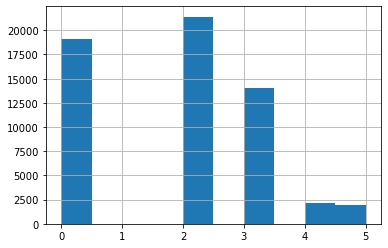

In [111]:
train["ncap_rating"].hist()

In [112]:
train["ncap_rating"].unique()

array([0, 2, 3, 5, 4], dtype=int64)

In [113]:
train[train["is_claim"] == 1]["ncap_rating"].value_counts(1)

2    0.371131
0    0.318036
3    0.240395
4    0.035486
5    0.034952
Name: ncap_rating, dtype: float64

In [114]:
train[train["is_claim"] == 0]["ncap_rating"].value_counts(1)

2    0.364871
0    0.326471
3    0.239169
4    0.036121
5    0.033367
Name: ncap_rating, dtype: float64

In [115]:
cat_cols = list(cat_cols)

In [116]:
cat_cols

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [117]:
train["height"].head()

0    1475
1    1475
2    1475
3    1515
4    1490
Name: height, dtype: int64

In [118]:
train["airbags"].value_counts(1)

2    0.689941
6    0.289425
1    0.020634
Name: airbags, dtype: float64

In [119]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier, Pool

cat_model = CatBoostClassifier(
    iterations = 1000, # 1000 are ideal
    loss_function='MultiClass',
    bootstrap_type = "Bayesian",
    eval_metric = 'MultiClass',
    leaf_estimation_iterations = 100,
    random_strength = 0.5,
    depth = 7,
    l2_leaf_reg = 5,
    learning_rate=0.1,
    bagging_temperature = 0.5,
    task_type = "GPU",
)

# training the model
cat_model.fit(X_train,y_train)

# predicting the model output
y_pred_cat = cat_model.predict(X_test)
# printing the accuracy of the tuned model
print("accuracy of the catboost: ",accuracy_score(y_test,y_pred_cat))

# confusion metrics of the LightGBM and plotting the same
confusion_matrix_LightGBM = confusion_matrix(y_test,y_pred_cat)
print(confusion_matrix_LightGBM) 


 

0:	learn: 0.5771120	total: 73.8ms	remaining: 1m 13s
1:	learn: 0.4899243	total: 132ms	remaining: 1m 5s
2:	learn: 0.4253579	total: 194ms	remaining: 1m 4s
3:	learn: 0.3788671	total: 255ms	remaining: 1m 3s
4:	learn: 0.3429479	total: 320ms	remaining: 1m 3s
5:	learn: 0.3158124	total: 386ms	remaining: 1m 3s
6:	learn: 0.2956098	total: 448ms	remaining: 1m 3s
7:	learn: 0.2797397	total: 495ms	remaining: 1m 1s
8:	learn: 0.2679708	total: 560ms	remaining: 1m 1s
9:	learn: 0.2584803	total: 622ms	remaining: 1m 1s
10:	learn: 0.2511513	total: 687ms	remaining: 1m 1s
11:	learn: 0.2455178	total: 748ms	remaining: 1m 1s
12:	learn: 0.2409811	total: 813ms	remaining: 1m 1s
13:	learn: 0.2375303	total: 875ms	remaining: 1m 1s
14:	learn: 0.2348459	total: 939ms	remaining: 1m 1s
15:	learn: 0.2326576	total: 1s	remaining: 1m 1s
16:	learn: 0.2308953	total: 1.07s	remaining: 1m 1s
17:	learn: 0.2294104	total: 1.13s	remaining: 1m 1s
18:	learn: 0.2281790	total: 1.19s	remaining: 1m 1s
19:	learn: 0.2272037	total: 1.26s	remainin

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))